# Python TFM Section

## Modelling III

1. Develope and improve the most sucessful model

In [772]:
from pathlib import Path
from scipy import stats

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [773]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize = df_modelize.fillna(0)

df_modelize['INTEGRAL_COSTS']  = \
df_modelize['AMONIACO'] + \
df_modelize['ATR'] + \
df_modelize['BONO_SOCIAL_PEGO'] + \
df_modelize['CALIZAS'] + \
df_modelize['CANON HID'] + \
df_modelize['CANON_CONCESION'] + \
df_modelize['CANON_HID_CATALUÃÂA'] + \
df_modelize['CANON_NC_CATALUÃÂA'] + \
df_modelize['CANON_NC_EST'] + \
df_modelize['CENTIMO_VERDE'] + \
df_modelize['COSTE_COMBUSTIBLE'] + \
df_modelize['IMPUESTO ELECT'] + \
df_modelize['LUBRICANTES'] + \
df_modelize['OTROS'] + \
df_modelize['PEAJE GEN'] +  \
df_modelize['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize['SERV_GEST_RES'] + \
df_modelize['TASAS_MEDIOAMB'] + \
df_modelize['TASA_ARAGON'] 



df_modelize2 = df_modelize[['VERSION','ID_TECNOLOGIA','POWER_MWH','INTEGRAL_COSTS']]
df_modelize2['VERSION_Y'] = df_modelize2['VERSION'].astype(str).str[:-2].astype(np.int64)
df_modelize2['VERSION_M'] = df_modelize2['VERSION'].astype(str).str[4:].astype(np.int64)
df_modelize2 = df_modelize2.drop(df_modelize2[df_modelize2['INTEGRAL_COSTS'] > 0].index)

#GENERO TRES COLUMNAS PARA LAS FECHAS, 
#UNA PARA EL AÑO PARA SABER EL PERIODO EN EL QUE ESTOY, 
#OTRA QUE ES EL NUMERO DEL MES DESDE 1 A 24 PARA QUE EL MODELO SEPA LA SUCESIÓN EN QUE ORDEN VA YA QUE 201712 ESTÁ MUY LEJOS DE 201801
#LA TERCERA ES EL MES PARA QUE ENTIENDA LAS ASOCIACIONES QUE HAY ENTRE ENERO-ENERO, FEBRERO-FEBRERO

#LE APLICO UN ONEHOT PARA LAS TECNOLOGIAS


df_month = df_modelize2['VERSION'].drop_duplicates().reset_index()
df_month = df_month['VERSION'].reset_index()
df_month.rename(columns={'index':'VERSION2'}, inplace=True)
df_modelize2 = pd.merge(df_modelize2, df_month, on=['VERSION'], how='left')
df_modelize2 = df_modelize2.drop(columns=['VERSION'])
df_modelize2['VERSION2'] = df_modelize2['VERSION2'] + 1

# df_modelize2 = df_modelize2[df_modelize2['ID_TECNOLOGIA'] != 'BP']
# df_modelize2 = df_modelize2[df_modelize2['ID_TECNOLOGIA'] != 'BX']

DTECH = pd.get_dummies(pd.Series(list(df_modelize2['ID_TECNOLOGIA'])))
df_modelize2 = pd.merge(df_modelize2, DTECH, left_index=True, right_index=True)
df_modelize2 = df_modelize2.drop(columns=['ID_TECNOLOGIA'])
df_modelize2.rename(columns={'INTEGRAL_COSTS':'t0'}, inplace=True)
df_modelize2.sample(10)

C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,POWER_MWH,t0,VERSION_Y,VERSION_M,VERSION2,BP,BX,CI,EB,GN,HN,LN,NC
479,5139822.980,-3788860.0,2017,12,12,0,0,1,0,0,0,0,0
136,40149.960,-27768.0,2017,4,4,1,0,0,0,0,0,0,0
363,-116487.340,0.0,2017,9,9,1,0,0,0,0,0,0,0
132,281603.021,-187764.0,2017,4,4,0,0,0,1,0,0,0,0
238,250413.622,-975308.0,2017,6,6,0,0,0,1,0,0,0,0
778,4497129.361,-10598783.0,2018,8,20,0,0,0,0,0,0,1,0
627,5128846.580,-8944226.0,2018,4,16,0,0,1,0,0,0,0,0
700,-84689.440,0.0,2018,6,18,1,0,0,0,0,0,0,0
469,2138450.150,-3752655.0,2017,12,12,0,0,0,0,1,0,0,0
91,-51527.740,0.0,2017,3,3,1,0,0,0,0,0,0,0


In [774]:
input_col = []
for i in range(2):
    input_col.append("t"+str(i))
    df_modelize2["t"+str(i)]=df_modelize2["t0"].shift(i)
df_modelize2=df_modelize2.dropna()
df_modelize2.head(5)

,POWER_MWH,t0,VERSION_Y,VERSION_M,VERSION2,BP,BX,CI,EB,GN,HN,LN,NC,t1
1,940091.558,-11215426.0,2017,1,1,0,0,0,0,0,0,0,1,-12774780.0
2,-1418.032,0.0,2017,1,1,0,0,0,0,0,0,0,1,-11215426.0
3,22830.702,-242300.0,2017,1,1,0,0,0,1,0,0,0,0,0.0
4,-418.593,-21771.0,2017,1,1,0,1,0,0,0,0,0,0,-242300.0
5,11909.436,-105460.0,2017,1,1,0,0,0,1,0,0,0,0,-21771.0


In [775]:
print(df_modelize2.shape)
df_modelize2.columns

(938, 14)


Index(['POWER_MWH', 't0', 'VERSION_Y', 'VERSION_M', 'VERSION2', 'BP', 'BX',
       'CI', 'EB', 'GN', 'HN', 'LN', 'NC', 't1'],
      dtype='object')

# Model Aplication

## Instances Creation

In [776]:
# Import Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_modelize2[['POWER_MWH','VERSION_Y', 'VERSION_M', 'VERSION2', 'CI', 'EB','GN', 'HN', 'LN', 'NC','t1','BP','BX']]
y = df_modelize2['t0']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

In [777]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colnames = X_train.columns

In [778]:
Xs_train = scaler.fit_transform(X_train.values)
Xs_train = pd.DataFrame(Xs_train)
Xs_train.columns = colnames
Xs_train.shape

(844, 13)

In [779]:
Xs_test = scaler.fit_transform(X_test.values)
Xs_test = pd.DataFrame(Xs_test)
Xs_test.columns = colnames
Xs_test.shape

(94, 13)

In [780]:
## Code for inversing the transformation once the predictor is used
# df_Unscaled = scaler.inverse_transform(df_Scaled)
# df_Unscaled = pd.DataFrame(df_Unscaled)
# df_Unscaled.columns = colnames
# df_Unscaled.head(5)

## XGBoost

In [781]:
# Load the library
import xgboost as XGB
# Create an instance
regXGB = XGB.XGBRegressor(n_estimators=100, 
                          learning_rate=0.1, 
                          gamma=0, 
                          subsample=0.7,
                          colsample_bytree=1, 
                          max_depth=6)
# Fit the data
regXGB.fit(Xs_train,y_train)
# Do predictions
y_regXGB_pred = regXGB.predict(Xs_test)

2415997303176.5903
Mean error represents  22.0 % from the mean value


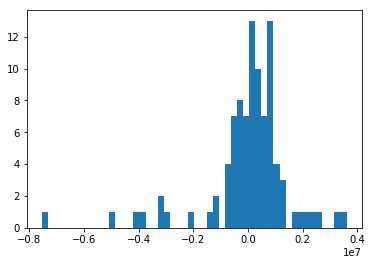

In [782]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,y_regXGB_pred))
print("Mean error represents ", round(100*mean_squared_error(y_test,y_regXGB_pred)/y_test.mean()**2), "% from the mean value")
plt.hist(y_test-y_regXGB_pred,bins=50);

Let's apply the cross validation to the model for the future comparation

In [783]:
from sklearn.model_selection import cross_val_score
score_XGB = cross_val_score(regXGB,Xs_train,y_train,  cv=5,scoring = 'neg_mean_squared_error').mean()


## XGBoost with GridSearchCV [Final Model]

In [784]:
# Load the library
from sklearn.model_selection import GridSearchCV

This GScv is the longest to be trained, but it's still pretty fast <<5.9min finished>>

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  5.8min finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:8

{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
-5031854322956.231
2539179632504.9673
Mean error represents  24.0 % from the mean value


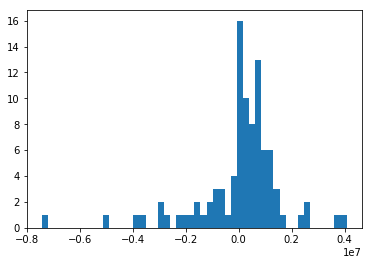

In [785]:
# Load the library
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor


# Create an instance
        
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'learning_rate': [0.01, 0.05, 0.11], 
              'max_depth':np.arange(3,10),
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree':[0.3,0.6,0.9,1],
              'n_estimators': [500]}

regXGBGS = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        scoring="neg_mean_squared_error",
                        verbose=9)

# Fit the data
regXGBGS.fit(Xs_train,y_train)


print(regXGBGS.best_params_)
print(regXGBGS.best_score_)
score_XGBGS=regXGBGS.best_score_

regXGBGS = regXGBGS.best_estimator_


# Do predictions
y_regXGBGS_pred = regXGBGS.predict(Xs_test)
print(mean_squared_error(y_test,y_regXGBGS_pred))
print("Mean error represents ", round(100*mean_squared_error(y_test,y_regXGBGS_pred) /y_test.mean()**2), "% from the mean value")
plt.hist(y_test-y_regXGBGS_pred,bins=50);

Finally, let's show the answer to my very stucked question of how could it be better a model without GS than with it..

In [788]:
print("The error with GridSearchCv is :", score_XGBGS)
print("The error without GS but with Cv is :",score_XGB)

The error with GridSearchCv is : -5031854322956.231
The error without GS but with Cv is : -5646076182423.424


Ahahá!, Finally we let it clear; **GS minimize the error with a deeper rate of confidence** thank to the cross validation instead of focusing ONLY in just one distribution of test and train

## Overfitting the model

## XGBoost

Interesting results are shown when removing the values with greater errors, eliminating them greatly improves the error distribution (which can be seen in the histogram), but very large point errors appear in other points previously assigned better. 

That is, it surely overfitting, losing the ability to generalize.

After an iteration, we eliminate the 5 values that give the most errors in the model and we re-train it

In [737]:
df_modelize3 = df_modelize2.copy().drop(pd.DataFrame(np.abs(y_test-y_regXGB_pred)).sort_values(by=['t0'],ascending = False).head(5).index)

X2 = df_modelize3[['POWER_MWH','VERSION_Y', 'VERSION_M', 'VERSION2', 'CI', 'EB','GN', 'HN', 'LN', 'NC','t1','BP','BX']]
y2 = df_modelize3['t0']


# Create Instance
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.10 , random_state = 42)


scaler2 = StandardScaler()
colnames2 = X2_train.columns

X2s_train = scaler2.fit_transform(X2_train.values)
X2s_train = pd.DataFrame(X2s_train)
X2s_train.columns = colnames2
X2s_test = scaler2.fit_transform(X2_test.values)
X2s_test = pd.DataFrame(X2s_test)
X2s_test.columns = colnames2

5597515214590.449
Mean error represents  63.0 % from the mean value


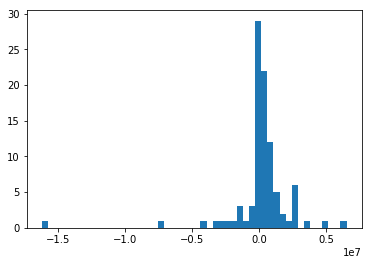

In [738]:
# Load the library
import xgboost as XGB2
# Create an instance
regXGB2 = XGB2.XGBRegressor(n_estimators=100, 
                          learning_rate=0.1, 
                          gamma=0, 
                          subsample=0.7,
                          colsample_bytree=1, 
                          max_depth=6)
# Fit the data
regXGB2.fit(X2s_train,y2_train)
# Do predictions
y2_regXGB_pred = regXGB2.predict(X2s_test)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y2_test,y2_regXGB_pred))
print("Mean error represents ", round(100*mean_squared_error(y2_test,y2_regXGB_pred)/y2_test.mean()**2), "% from the mean value")
plt.hist(y2_test-y2_regXGB_pred,bins=50);

As we said, it improves the histogram but a point appears with a huge error, in fact, if we eliminate that single point, it improves the accuracy incredibly (although it is still cheating)

Mean error represents  18 % from the mean value


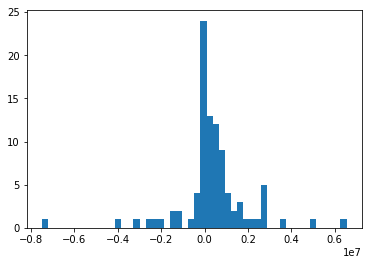

In [739]:
new_hist=pd.DataFrame(y2_test-y2_regXGB_pred).sort_values(by=['t0'],ascending = True).iloc[1:]
print("Mean error represents ",round(math.sqrt((new_hist['t0']**2).sum())*10**7/(y2_test.mean()**2)), "% from the mean value")
plt.hist(new_hist['t0'],bins=50);

Finally, if we compare this vitamin distribution with the original model, we see how the vitamin one predicts better, but on a much more selective and selected data. 

**That is, it actually generalizes worse**

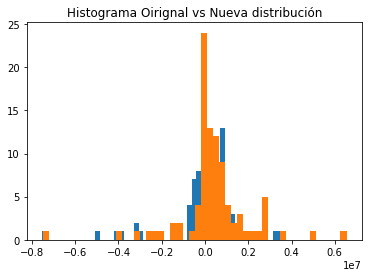

In [740]:
plt.hist(y_test-y_regXGB_pred,bins=50);
plt.title('Histograma Oirignal vs Nueva distribución')
plt.hist(new_hist['t0'],bins=50);